In [1]:
# necessary imports
import numpy as np
import os
import seaborn as sns
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
import wrangle as wra
import env
from sklearn.model_selection import train_test_split

# Acquire

In [2]:
# build query and look at data
zillow_query = """
        select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        from properties_2017
        where propertylandusetypeid = '261';
        """

zillow_df = wra.get_zillow_data(zillow_query)

zillow_df.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
df = zillow_df

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Sample and Summarize

In [5]:
df.rename(columns={'calculatedfinishedsquarefeet': 'squarefeet', 'taxvaluedollarcnt': 'taxvalue', 'fips': 'county'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedroomcnt   float64
 1   bathroomcnt  float64
 2   squarefeet   float64
 3   taxvalue     float64
 4   yearbuilt    float64
 5   taxamount    float64
 6   county       float64
dtypes: float64(7)
memory usage: 115.0 MB


In [7]:
df.shape

(2152863, 7)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
squarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvalue,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
county,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


# Acquire and Summarize Takeaways
* All objects are floats
* We have 2,152,863 rows and 7 columns


# Prepare
## Goals:

* verify/correct datatypes
* handle your nulls
* encode your string values
* visualize our univariate variables
* end with my train/validate/test split
* rename columns

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(2140235, 7)

In [11]:
df.isnull().sum()

bedroomcnt     0
bathroomcnt    0
squarefeet     0
taxvalue       0
yearbuilt      0
taxamount      0
county         0
dtype: int64

In [12]:
df[['bedroomcnt', 'squarefeet', 'taxvalue', 'yearbuilt', 'county']] = df[['bedroomcnt', 'squarefeet', 'taxvalue', 'yearbuilt', 'county']].astype(int)


In [13]:
df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})

In [14]:
df.head()

,bedroomcnt,bathroomcnt,squarefeet,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedroomcnt   int64  
 1   bathroomcnt  float64
 2   squarefeet   int64  
 3   taxvalue     int64  
 4   yearbuilt    int64  
 5   taxamount    float64
 6   county       object 
dtypes: float64(2), int64(4), object(1)
memory usage: 130.6+ MB


In [17]:
df.head()

,bedroomcnt,bathroomcnt,squarefeet,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
18,3,1.0,1244,169471,1950,2532.88,LA
19,3,2.0,1300,233266,1950,3110.99,LA


In [18]:
for col in df.columns:
    top_5 = df[col].nlargest(5)
    print(f'Top 5 largest values in column {col}:')
    print(top_5)

Top 5 largest values in column bedroomcnt:
26485      25
799516     18
1661135    18
1758193    18
650428     16
Name: bedroomcnt, dtype: int64
Top 5 largest values in column bathroomcnt:
1657947    32.0
26485      20.0
701366     20.0
1114403    20.0
1174755    20.0
Name: bathroomcnt, dtype: float64
Top 5 largest values in column squarefeet:
849924     952576
1689332    531118
1432166     63692
830510      59220
530834      52503
Name: squarefeet, dtype: int64
Top 5 largest values in column taxvalue:
530834     90188462
950854     88020448
1618393    83196095
2134692    71067500
430030     70416358
Name: taxvalue, dtype: int64
Top 5 largest values in column yearbuilt:
21       2016
21548    2016
43157    2016
43187    2016
53820    2016
Name: yearbuilt, dtype: int64
Top 5 largest values in column taxamount:
530834     1078101.87
950854     1052070.50
1618393     994030.96
430030      841059.04
2134692     824166.91
Name: taxamount, dtype: float64


TypeError: Cannot use method 'nlargest' with dtype object

In [20]:
df.taxvalue.nsmallest(10)

1350621    17709
1155530    17713
532418     17716
338394     17752
812423     17752
2082192    17752
91057      17753
112547     17753
800744     17753
866073     17753
Name: taxvalue, dtype: int64

In [19]:
for col in df.columns:
    bottom_5 = df[col].nsmallest(5)
    print(f'Bottom 5 smallest values in column {col}:')
    print(bottom_5)

Bottom 5 smallest values in column bedroomcnt:
2306    0
2313    0
2676    0
3530    0
3740    0
Name: bedroomcnt, dtype: int64
Bottom 5 smallest values in column bathroomcnt:
398     0.0
753     0.0
1546    0.0
2306    0.0
2313    0.0
Name: bathroomcnt, dtype: float64
Bottom 5 smallest values in column squarefeet:
58438      1
1046787    1
1276353    1
1359288    1
1895866    1
Name: squarefeet, dtype: int64
Bottom 5 smallest values in column taxvalue:
1350621    17709
1155530    17713
532418     17716
338394     17752
812423     17752
Name: taxvalue, dtype: int64
Bottom 5 smallest values in column yearbuilt:
1005349    1801
1048331    1801
1823373    1801
1104175    1807
1674301    1812
Name: yearbuilt, dtype: int64
Bottom 5 smallest values in column taxamount:
463137    16.48
968217    18.72
7866      20.24
828290    20.24
871365    20.24
Name: taxamount, dtype: float64


TypeError: Cannot use method 'nsmallest' with dtype object

In [18]:
df = df [df.squarefeet < 25_000]

In [19]:
df = df [df.taxvalue < df.taxvalue.quantile(.95)].copy()

In [ ]:
df = df[df.taxvalue > df.taxvalue.quantile(.001)].copy()

# Visualize

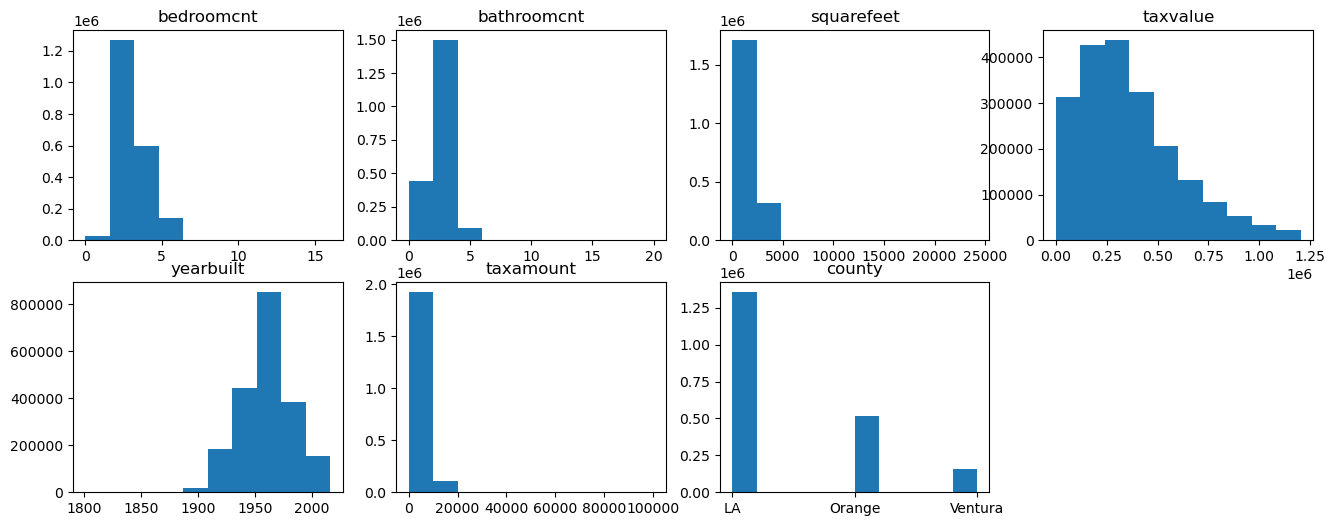

In [20]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

bedroomcnt


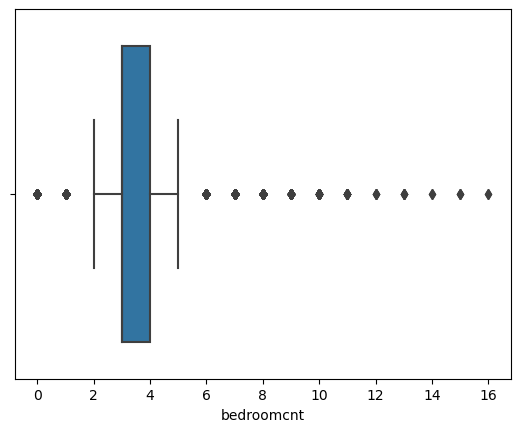

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: bedroomcnt, dtype: int64

bathroomcnt


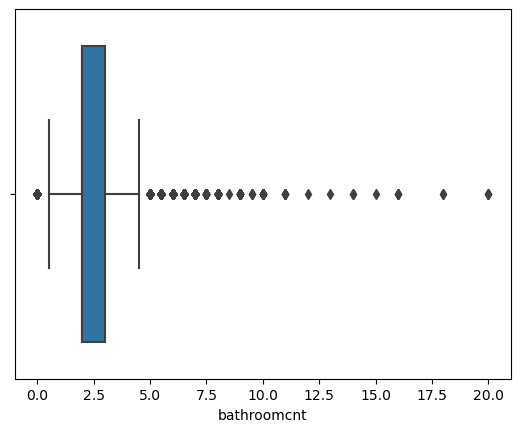

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathroomcnt, dtype: int64

squarefeet


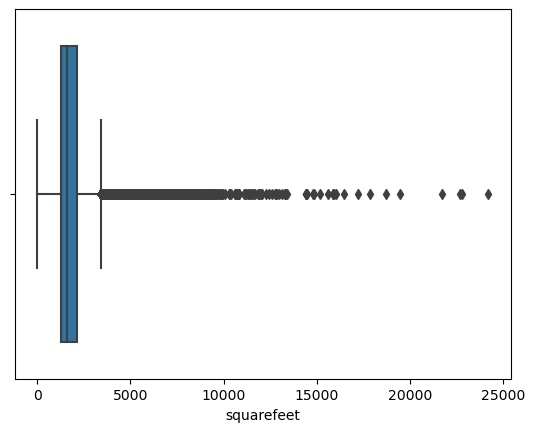

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: squarefeet, Length: 6639, dtype: int64

taxvalue


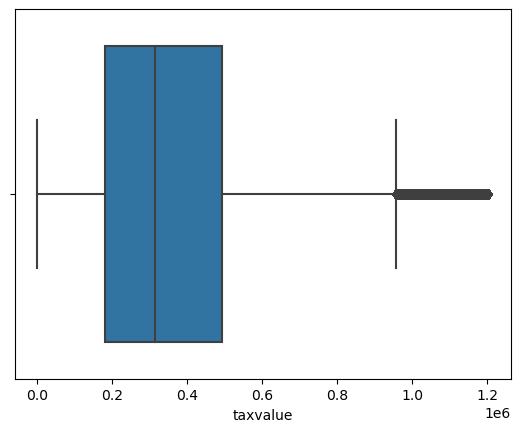

22         10
23          6
31          1
46          1
101         1
           ..
1202886     1
1202942     1
1202959     1
1202988     1
1202999     1
Name: taxvalue, Length: 523005, dtype: int64

yearbuilt


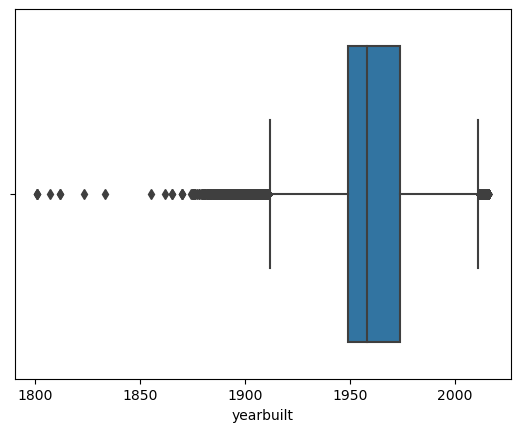

1801        3
1807        1
1812        2
1823        1
1833        1
1855        1
1862        1
1865        2
1870        3
1874        1
1875        9
1876        2
1877        1
1878        2
1879        1
1880       39
1881        3
1882        6
1883        8
1884       12
1885      168
1886       33
1887       74
1888       80
1889       28
1890      530
1891       30
1892       62
1893       88
1894      102
1895      558
1896      125
1897      128
1898      254
1899      137
1900      670
1901     1198
1902      661
1903     1127
1904     1011
1905     2818
1906     2117
1907     2411
1908     3039
1909     2784
1910     5481
1911     3925
1912     5842
1913     3876
1914     3162
1915     2776
1916     2028
1917     1494
1918     1738
1919     2740
1920     7520
1921     9108
1922    15275
1923    21001
1924    20406
1925    19035
1926    17081
1927    13408
1928    13116
1929    10498
1930     8922
1931     4969
1932     3258
1933     2380
1934     2108
1935     4361
1936  

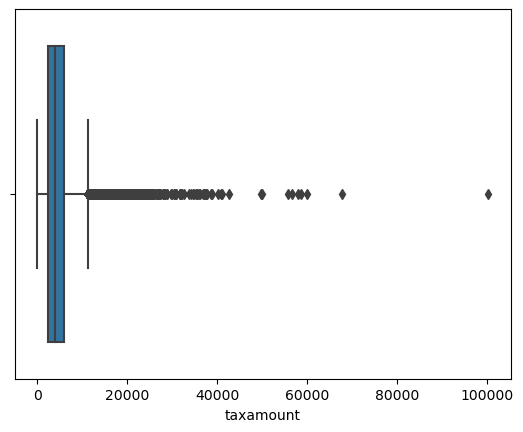

6.34         1
13.36        4
13.44        1
13.47        4
13.48        1
            ..
57963.32     1
58634.77     1
60110.79     1
67715.45     1
100379.34    1
Name: taxamount, Length: 814643, dtype: int64



In [21]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

In [23]:
df = wra.split_data(df)

In [24]:
df

(         bedroomcnt  bathroomcnt  squarefeet  taxvalue  yearbuilt  taxamount  \
 1571798           4          2.5        2987    885000       2006   13617.38   
 1723553           3          2.0        3013    489511       1977    5768.57   
 718174            4          3.0        2572    390915       1986    4944.11   
 1663205           3          1.0        1589    321758       1959    4031.78   
 1087891           3          2.0        1727    231737       1962    2708.80   
 ...             ...          ...         ...       ...        ...        ...   
 531544            3          2.0        1610    226464       1984    3001.96   
 424806            2          1.0         900    227271       1938    3323.92   
 518081            3          3.0        1841    125533       1955    1731.15   
 669341            3          2.0        1406    364412       1956    4559.86   
 1587454           3          1.0        1571    207976       1948    2619.67   
 
           county  
 15717

In [25]:
train.head()

NameError: name 'train' is not defined